## Final Project Submission

Please fill out:
* Student name: Joseline Apiyo Odhiambo
* Student pace: part time
* Scheduled project review date/time: 
* Instructor name: Samuel G.
* Blog post URL:

**Importing the required libraries**

In [35]:
import itertools
import numpy as np
import pandas as pd
from numbers import Number
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import pickle

In [18]:
df = pd.read_csv('D:\PROJECT\phase2_project\data\kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

**Summary statistics**

In [25]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000
mean,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,3.409825,7.657915,1970.999676
std,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.650546,1.173200,29.375234
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,1.000000,3.000000,1900.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,3.000000,7.000000,1951.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,3.000000,7.000000,1975.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,4.000000,8.000000,1997.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,5.000000,13.000000,2015.000000


**Features dropped**

In [20]:
#Columns to drop
df = df.drop(columns=[
    'date', 'view', 'sqft_above', 'sqft_basement', 'id',
    'yr_renovated', 'zipcode', 'lat', 'long', 
    'sqft_living15', 'sqft_lot15'
])

# Print the remaining columns to verify
print(df.columns)



Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'condition', 'grade', 'yr_built'],
      dtype='object')


In [21]:
#Identfying features with Null values.
df.isnull().sum()

price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront     2376
condition         0
grade             0
yr_built          0
dtype: int64

*The waterfont value is the only feature with Null values*


**A pair plot to see the type of relationship between te features**

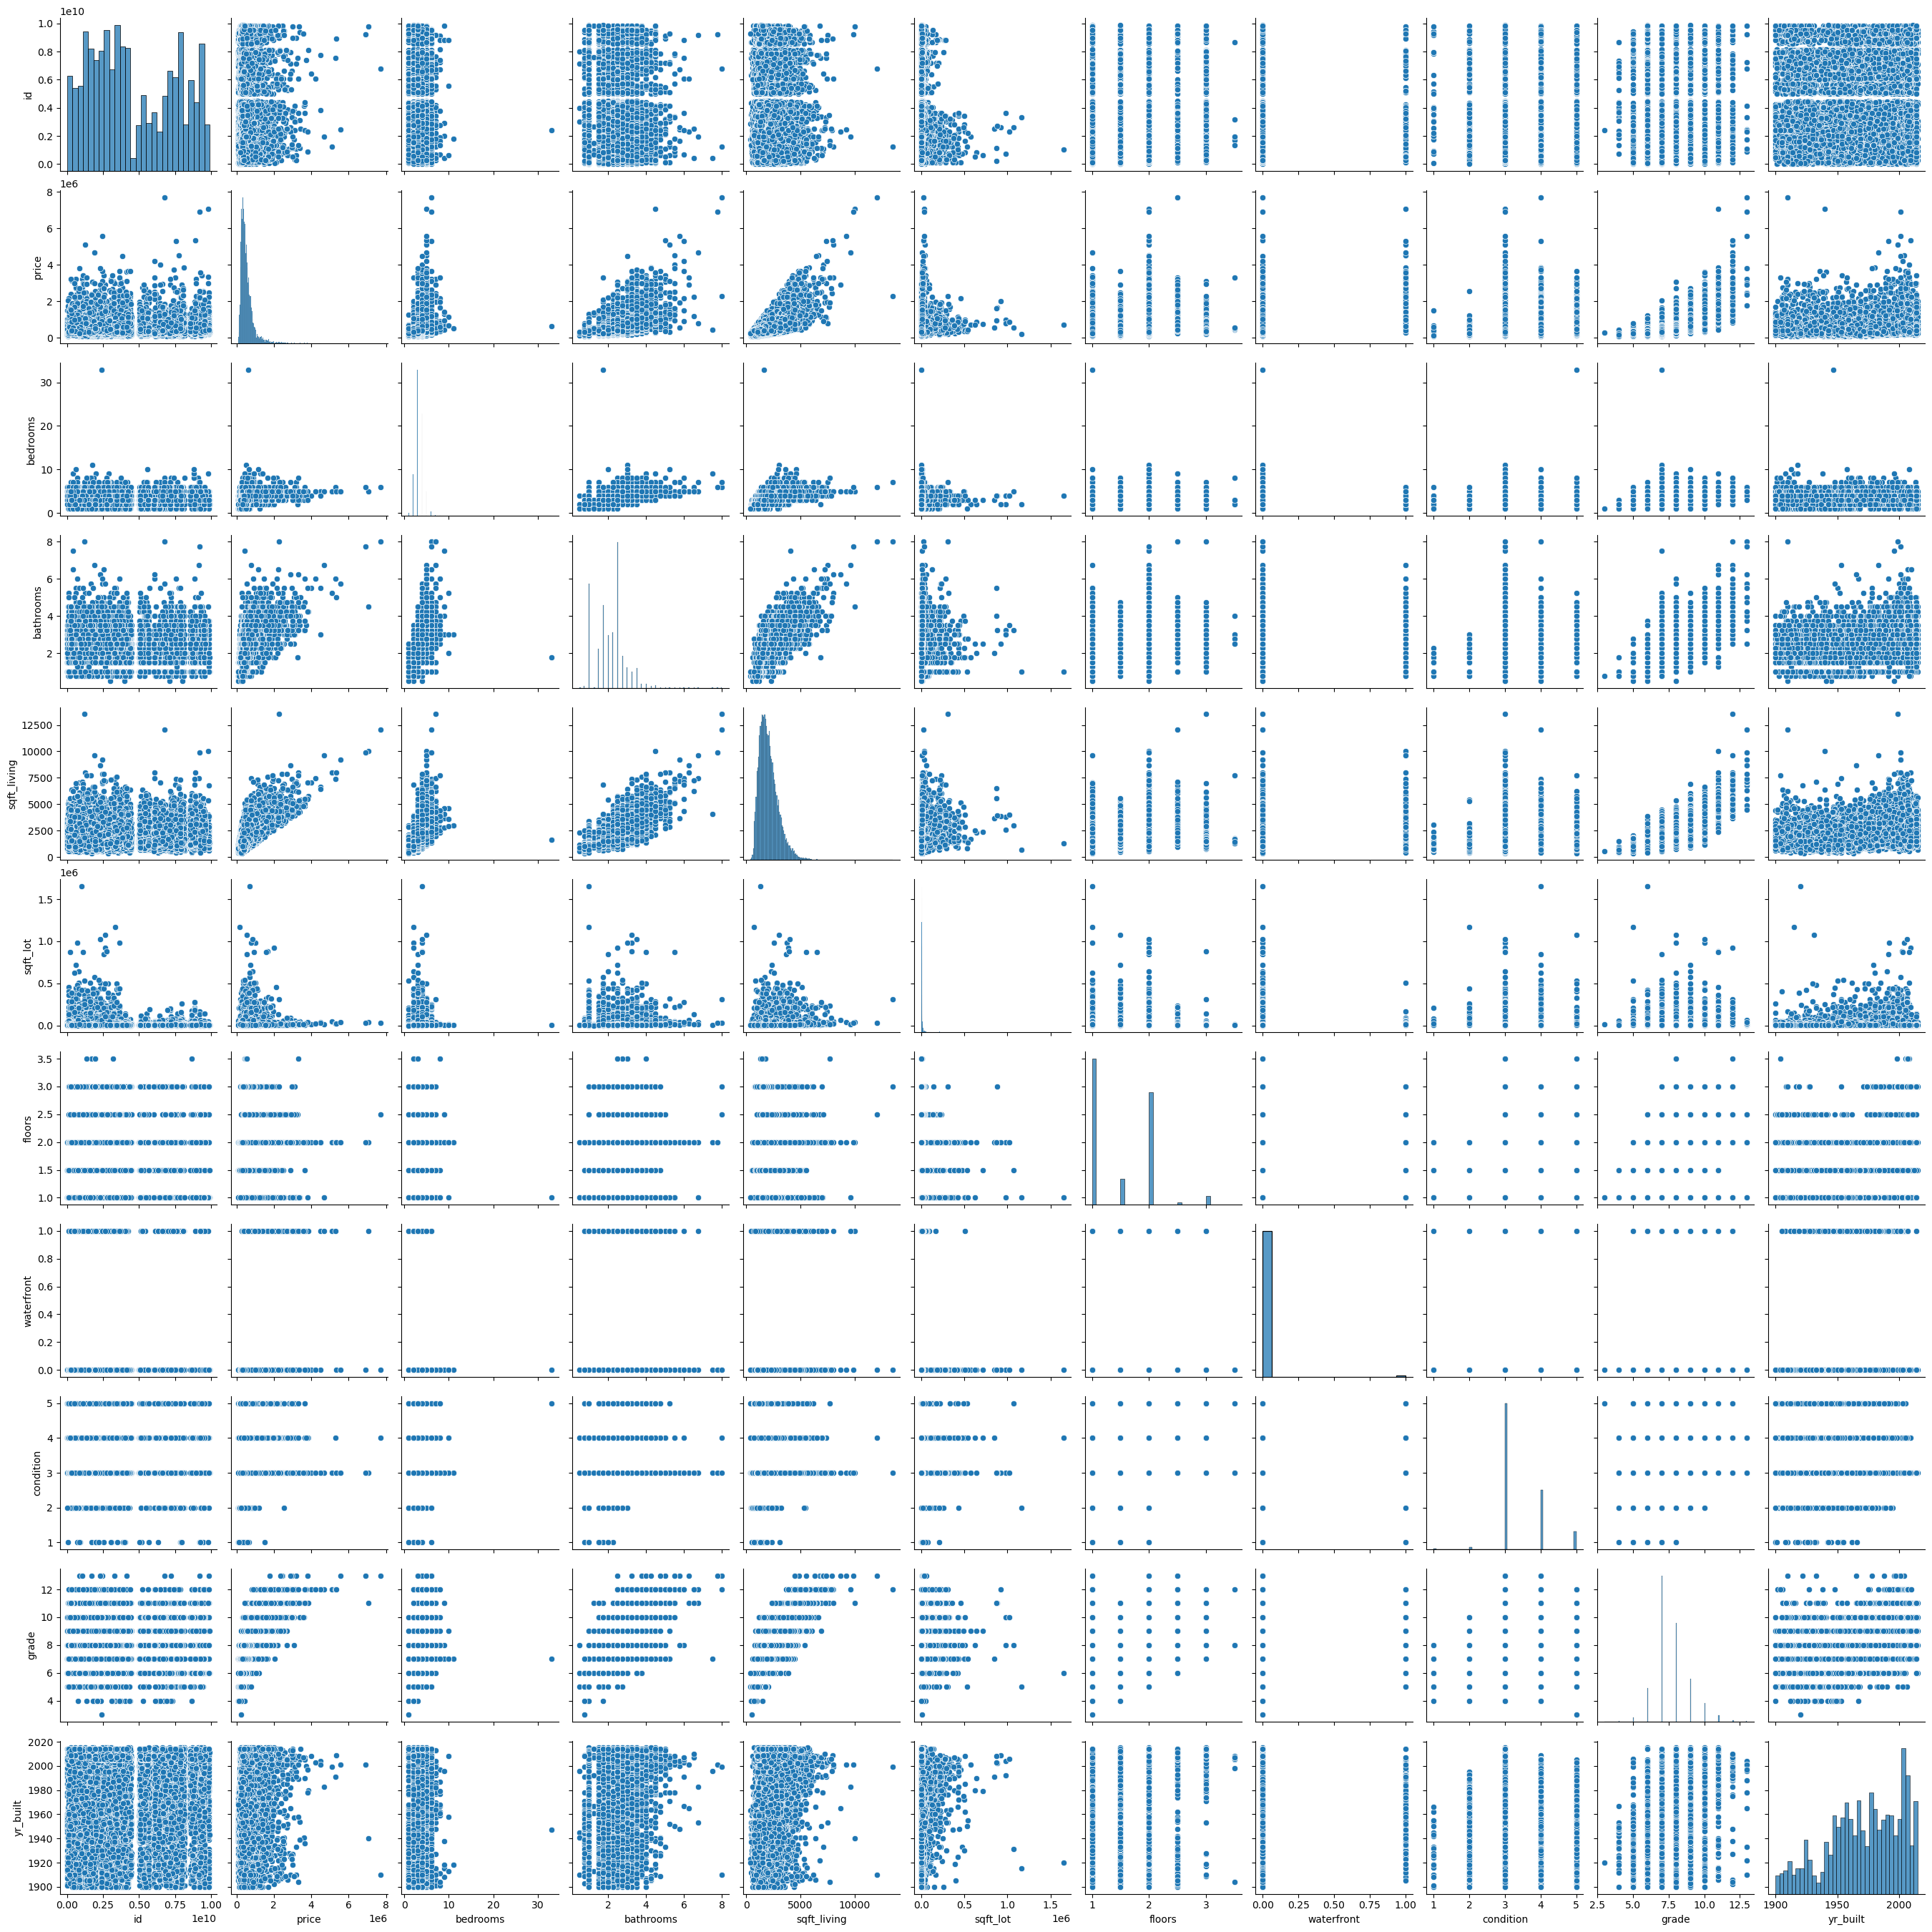

In [5]:
sns.pairplot(df)
plt.show()

*Now let us have a correlation table between the features in the table*.

*Here is the list of the features we are working with*

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'condition', 'grade', 'yr_built'],
      dtype='object')

*Being that the waterfront feature is the only feature with missing values, let us see how it correlates with the other features, as well as check the correlation between the other features too.*

In [22]:
df.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
price,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.276295,0.036056,0.667951,0.053953
bedrooms,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,-0.002386,0.026496,0.356563,0.155670
bathrooms,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.067282,-0.126479,0.665838,0.507173
sqft_living,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.110230,-0.059445,0.762779,0.318152
sqft_lot,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.023143,-0.008830,0.114731,0.052946
floors,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.021883,-0.264075,0.458794,0.489193
waterfront,0.276295,-0.002386,0.067282,0.110230,0.023143,0.021883,1.000000,0.017642,0.087383,-0.026079
condition,0.036056,0.026496,-0.126479,-0.059445,-0.008830,-0.264075,0.017642,1.000000,-0.146896,-0.361592
grade,0.667951,0.356563,0.665838,0.762779,0.114731,0.458794,0.087383,-0.146896,1.000000,0.447865
yr_built,0.053953,0.155670,0.507173,0.318152,0.052946,0.489193,-0.026079,-0.361592,0.447865,1.000000


*It is now clear that the waterfont features has no proper correlation with the rest of the features.*
*This is clearly indicated in regards to the highest correlation number between waterfront and price, the number is only 0.2. This is very low.*

**The water front feature will be dropped**

In [23]:
df = df.drop(columns=['waterfront']) 

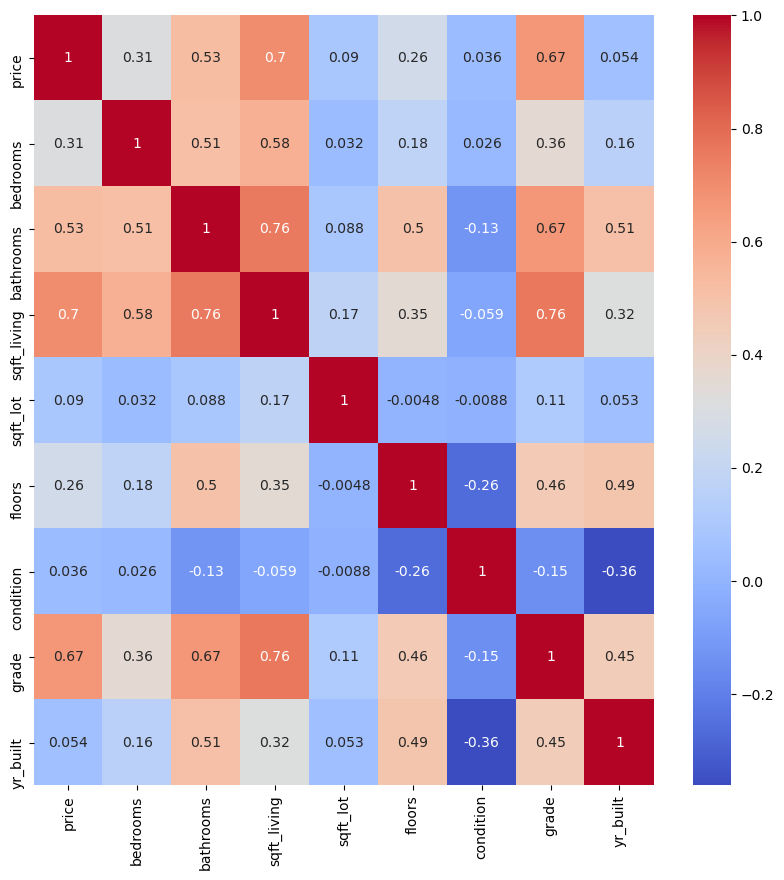

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

**Being that the analysis is done in regards to which feature posively affects the pricing of the houses, let us have a scatter plot ti see the correlation between 'price' and "sqft_living."**

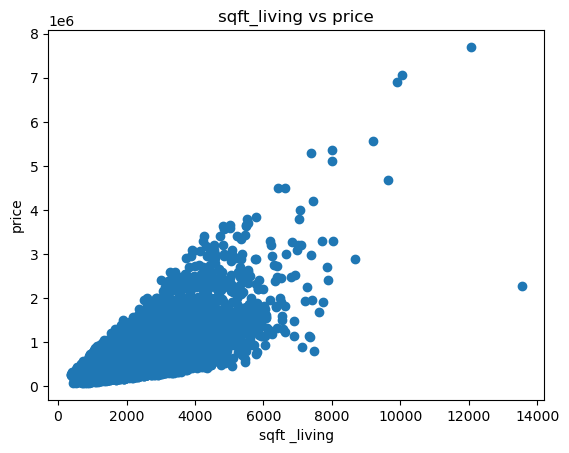

In [27]:
plt.scatter(df['sqft_living'] , df['price'])
plt.xlabel('sqft _living')
plt.ylabel('price')
plt.title('sqft_living vs price')
plt.show()

**Let us try to get a line of fit**

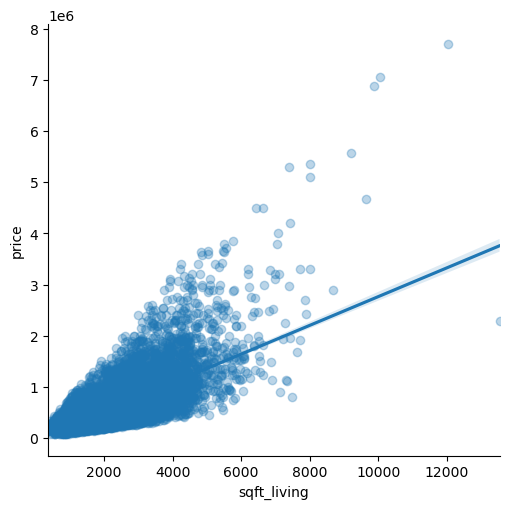

In [55]:
sns.lmplot(x="sqft_living", y="price", data=df, scatter_kws={"alpha":0.3})

2.0 **SPLITTING THE DATA**

X are the predictores, and y is the output. What we want to do is create a model that will take in the values in the X variable and predict y with a linear regression algorithm. We will use the SciKit Learn library to create the model.

We will later train the data using OLS for simple linear regression and multiple linear regression.

In [42]:
import numpy as np
from sklearn.model_selection import train_test_split


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        21597 non-null  float64
 1   bedrooms     21597 non-null  int64  
 2   bathrooms    21597 non-null  float64
 3   sqft_living  21597 non-null  int64  
 4   sqft_lot     21597 non-null  int64  
 5   floors       21597 non-null  float64
 6   condition    21597 non-null  int64  
 7   grade        21597 non-null  int64  
 8   yr_built     21597 non-null  int64  
dtypes: float64(3), int64(6)
memory usage: 1.5 MB


In [45]:
#Starting with atleast one feature and see the data output

x = df['sqft_living']
x

0        1180
1        2570
2         770
3        1960
4        1680
         ... 
21592    1530
21593    2310
21594    1020
21595    1600
21596    1020
Name: sqft_living, Length: 21597, dtype: int64

**Using OLS for a single variable regression also known as the "Simple Linear Regression".**

In [50]:
import pandas as pd
from statsmodels.formula.api import ols

In [51]:
# Fit the OLS model with the new column names
predictor1 = ols('price ~ sqft_living', data=df).fit()

# Print the summary of the model
predictor1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.097e+04
Date:                Wed, 17 Jul 2024   Prob (F-statistic):               0.00
Time:                        06:57:41   Log-Likelihood:            -3.0006e+05
No. Observations:               21597   AIC:                         6.001e+05
Df Residuals:                   21595   BIC:                         6.001e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -4.399e+04   4410.023     -9.975      0.000   -5.26e+04   -3.53e+04
sqft_living   280.8630      1.939    144.819      0.000     277.062     284.664
==============================================================================
Omnibus:                    14801.942   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           542662.604
Skew:                           2.820   Prob(JB):                         0.00
Kurtosis:                      26.901   Cond. No.                     5.63e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**The OLS regression results indicate how well the sqft_living feature explains the variation in house prices. Here are some key insights:**

**Model Performance**

**R-squared (0.493)**: This indicates that approximately 49.3% of the variance in house prices can be explained by the sqft_living feature. While this is a substantial proportion, it also suggests that there are other factors affecting house prices not captured by this model.
Adj. R-squared (0.493): The adjusted R-squared value is the same as the R-squared, suggesting that adding more variables would not necessarily improve the model fit significantly.

*Statistical Significance*
F-statistic (2.097e+04) and Prob (F-statistic) (0.00): The very high F-statistic and the corresponding p-value of 0.00 indicate that the model is statistically significant, meaning the relationship between sqft_living and house prices is not due to random chance.
t-statistic for sqft_living (144.819) and p-value (0.000): The t-statistic is very high, and the p-value is extremely low (0.00), indicating that sqft_living is a statistically significant predictor of house prices.

*Coefficients*
Intercept (-4.399e+04): This is the expected value of the dependent variable (house price) when all independent variables are zero. Although having a negative intercept doesn't have a real-world interpretation, it is a part of the linear regression equation.
Coefficient for sqft_living (280.8630): For each additional square foot of living space, the house price is expected to increase by approximately $280.86, holding all other factors constant.

*Business Insights*
Focus on Increasing sqft_living: Increasing the living space (square footage) of houses can significantly increase their prices. This feature is the most significant predictor of house prices in your model.
Other Factors: Since the R-squared value is 0.493, consider adding other relevant features (like location, number of bedrooms/bathrooms, condition, grade, etc.) to the model to explain more of the variance in house prices.
Renovation Strategy: When renovating houses, focus on expanding the living area, as it has the highest impact on increasing the price. However, also consider other features that may not have been included in this analysis.


*Next Steps*
Feature Engineering: Explore adding more features to the model to improve its explanatory power.
Address Non-Normal Residuals: Investigate transformations or other modeling techniques to handle non-normal residuals.
Model Validation: Perform cross-validation to ensure the model generalizes well to new data.







In [47]:
x = df[['sqft_living','grade','bathrooms', 'bedrooms']]
y = df['price']

In [49]:
x.head()
y.head()

0    221900.0
1    538000.0
2    180000.0
3    604000.0
4    510000.0
Name: price, dtype: float64

In [57]:
x_train,x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=42)

**Training the Model with multivariable regression using Scikit Learn**

In [58]:
from sklearn.linear_model import LinearRegression

AttributeError: module 'numpy' has no attribute 'float'.
`np.float` was a deprecated alias for the builtin `float`. To avoid this error in existing code, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations